# Part 1: Data preprocessing

dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

1. Importing the libraries
2. Importing the dataset
3. Dealing with missing data
4. Encoding categorical variables
5. Splitting the dataset into train and test set
6. Feature scaling

## Importing the libraries and dataset

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
dataset = pd.read_csv('car data.csv')

## Exploratory Data Analysis

In [50]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [51]:
dataset.shape

(301, 9)

In [52]:
# check the columns
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [53]:
# information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [54]:
# columns with categorical values
dataset.select_dtypes(include=['object']).columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [55]:
len(dataset.select_dtypes(include=['object']).columns)

4

In [56]:
# columns with numerical values
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [57]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

5

In [58]:
# statistical summary
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Dealing with the missing data

In [59]:
# check if there are any null values
dataset.isnull().values.any()

False

In [60]:
# check how many null values
dataset.isnull().values.sum()

0

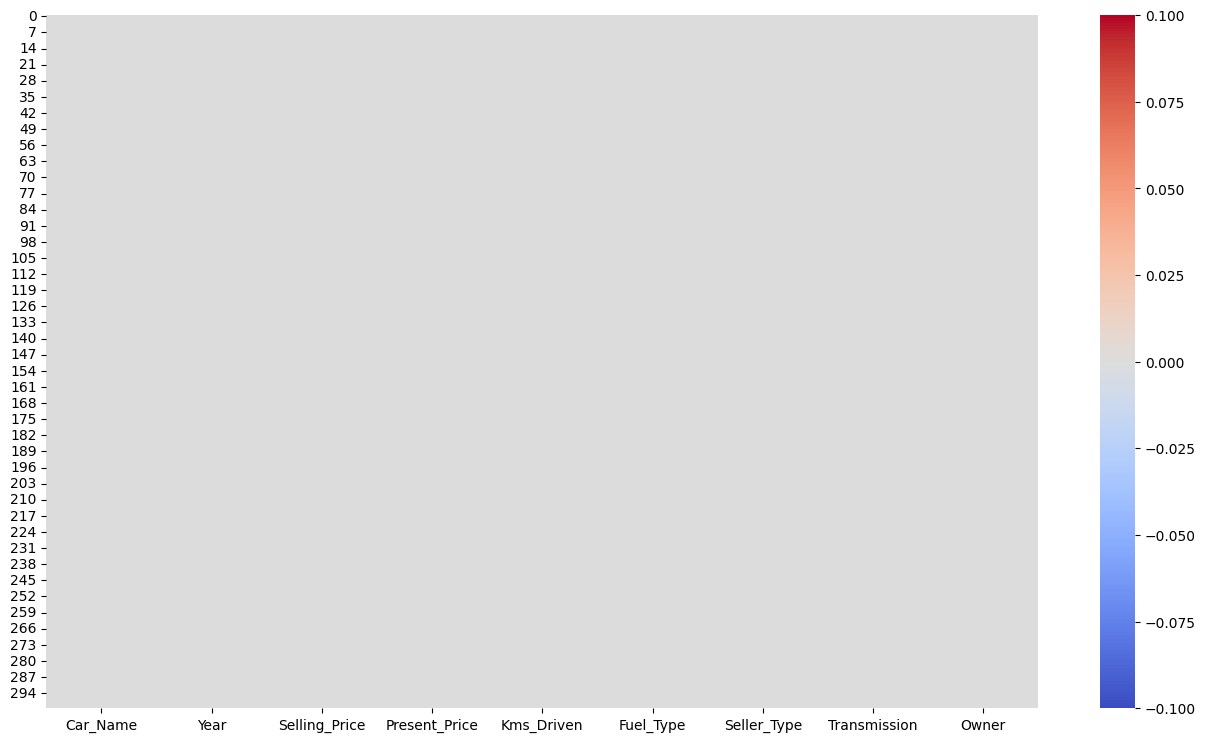

In [61]:
# show the null values using the heatmap
plt.figure(figsize=(16,9))
sns.heatmap(dataset.isnull(), cmap='coolwarm')
plt.show()

## Encoding the categorical data

In [62]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [63]:
dataset.shape

(301, 9)

In [64]:
# check the number of unique values in each column
print(dataset['Car_Name'].nunique())
print(dataset['Fuel_Type'].nunique())
print(dataset['Seller_Type'].nunique())
print(dataset['Transmission'].nunique())
print(dataset['Owner'].nunique())

98
3
2
2
3


In [65]:
dataset["Current_year"]=2020

In [66]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [67]:
dataset["Years_Old"]= dataset["Current_year"]-dataset["Year"]

In [68]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Years_Old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [69]:
dataset=dataset.drop(columns=["Year","Current_year","Car_Name"])

In [70]:
dataset = pd.get_dummies(data=dataset, drop_first=True,dtype="int")

In [71]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [72]:
dataset.shape

(301, 9)

## Correlation matrix and Heatmap

In [73]:
dataset_2 = dataset.drop(columns='Selling_Price')

<Axes: title={'center': 'Correlation with charges'}>

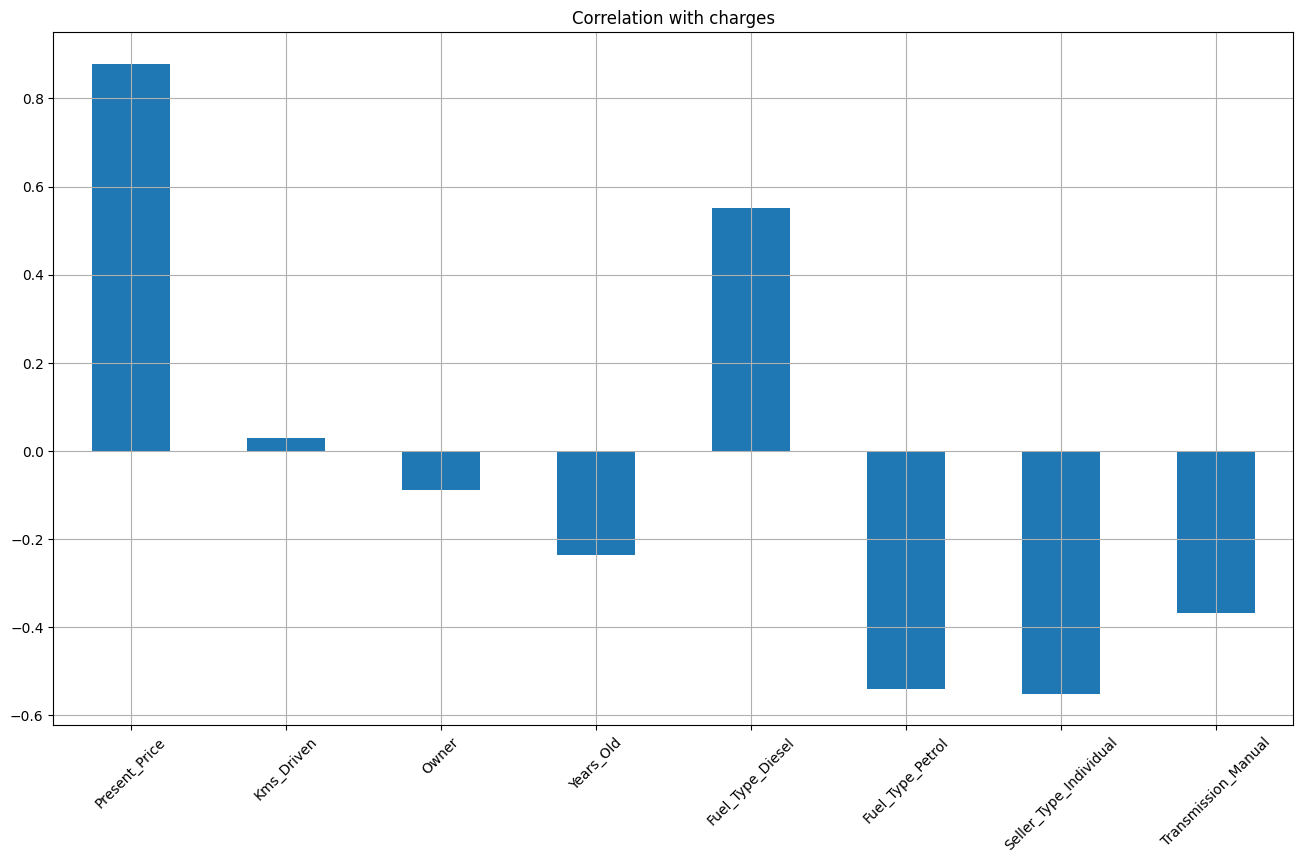

In [74]:
dataset_2.corrwith(dataset['Selling_Price']).plot.bar(
    figsize=(16,9), title = 'Correlation with charges',
    rot = 45, grid = True
)

In [75]:
# Create Correlation Matrix
corr = dataset.corr()

<Axes: >

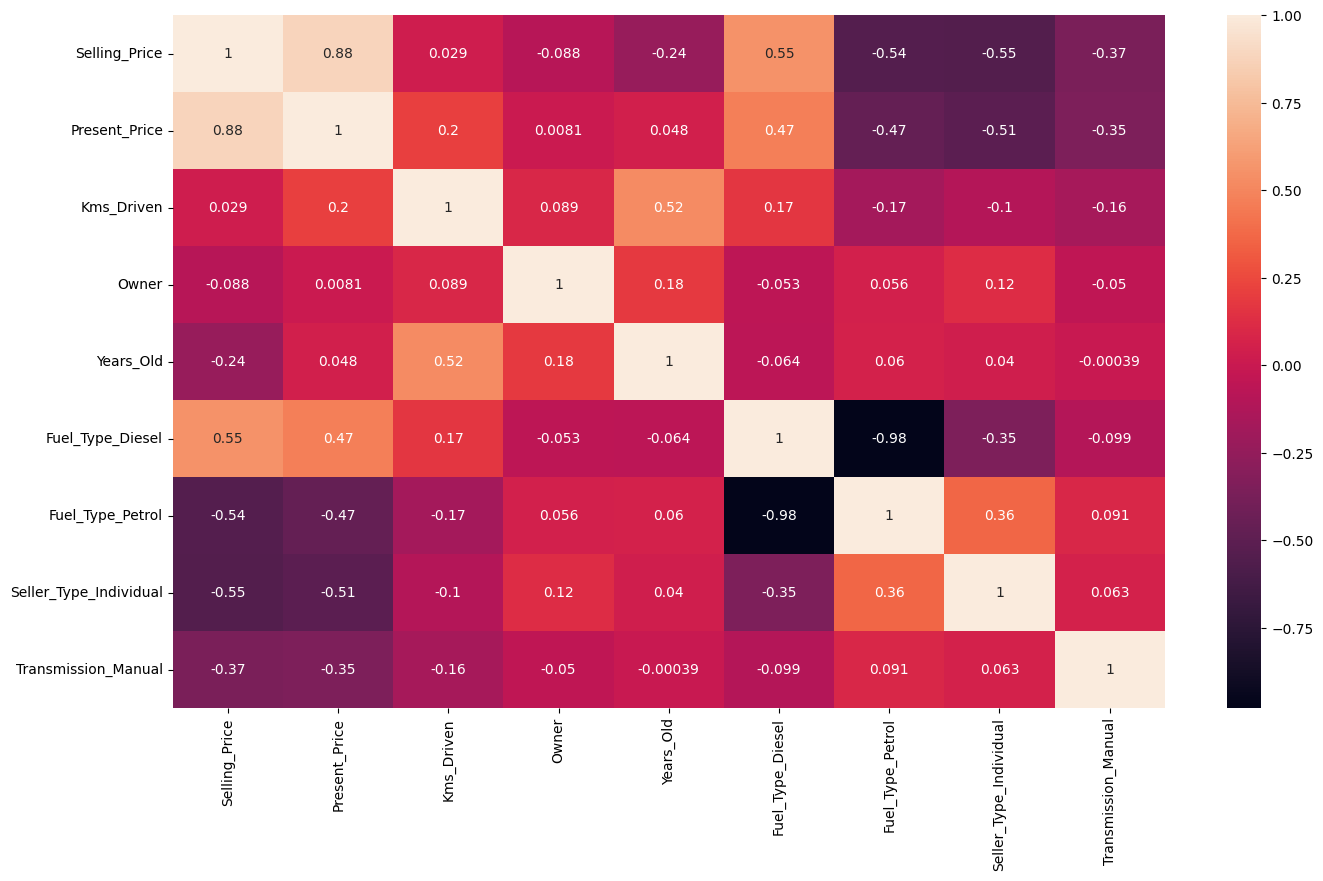

In [76]:
# correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## Splitting the dataset into train and test set

In [77]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [78]:
x = dataset.iloc[:, 1:].values

In [79]:
x.shape

(301, 8)

In [80]:
y = dataset.iloc[:, 0].values

In [81]:
y.shape

(301,)

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [83]:
x_train.shape

(240, 8)

In [84]:
x_test.shape

(61, 8)

In [85]:
y_train.shape

(240,)

In [86]:
y_test.shape

(61,)

## Feature Importance

In [87]:
from sklearn.ensemble import ExtraTreesRegressor

In [88]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [89]:
model.feature_importances_

array([3.78896330e-01, 4.10439884e-02, 3.52846866e-04, 7.41920085e-02,
       2.34742263e-01, 1.04557891e-02, 1.12528382e-01, 1.47788393e-01])

In [90]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [91]:
dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Years_Old',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [92]:
index = ['Present_Price', 'Kms_Driven', 'Owner', 'years_old',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']

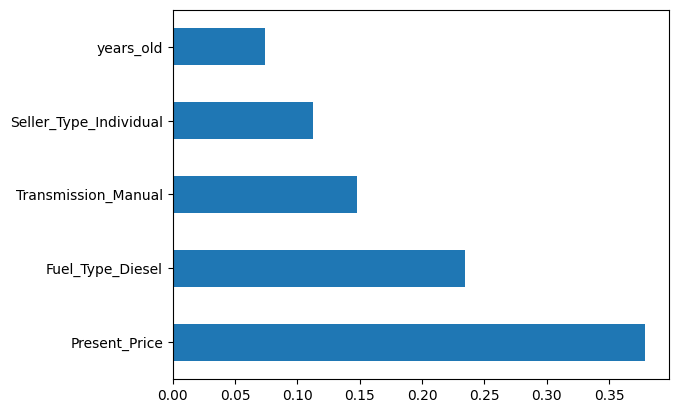

In [93]:
features_imps = pd.Series(model.feature_importances_, index=index)
features_imps.nlargest(5).plot(kind='barh')
plt.show()

# Part 2: Building the model

## 1) Multiple linear regression

In [94]:
# linear regression model
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [95]:
y_pred = regressor_lr.predict(x_test)

In [96]:
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [97]:
# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8217409639031206

## 2)  Random forest regression

In [98]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [99]:
y_pred = regressor_rf.predict(x_test)

In [100]:
# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8957104627062996

# Part 3: Fing the optimal parameters using RandomizedSearchCV

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
    }

In [107]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [108]:
random_forest = RandomizedSearchCV(estimator = regressor_rf, param_distributions = parameters, n_iter=10,
                                   scoring='neg_mean_absolute_error', cv = 5, verbose=2, n_jobs = 1)

In [109]:
random_forest.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=friedman_mse, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=20, max_features=auto, mi

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/s

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [110]:
random_forest.best_estimator_

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=500)

In [111]:
random_forest.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'squared_error'}

In [112]:
random_forest.best_score_

-0.889446126559515

# Part 4: Final model (Random forest)

In [114]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 500,min_samples_split= 5,min_samples_leaf=2,max_features= 'log2',max_depth= 10,criterion = 'squared_error')
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=500)

In [115]:
y_pred = regressor_rf.predict(x_test)

In [116]:
# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8957104627062996

# Part 5: Predict charges for a car

In [117]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [118]:
single_obs = [[9.54, 3500, 0, 4, 1, 0, 0, 1]]

In [119]:
new_pred = regressor.predict(single_obs)

In [120]:
print(' The predicted selling price for the car is: {} '.format(new_pred))

 The predicted selling price for the car is: [8.64778751] 
